In [1]:
import lmfit
import rampy as rp #Charles' libraries and functions

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from Modules.custom_funx import *

In [2]:
def load_files(dir_name):
    '''
    Load all files from the directory path
    The dataframe output and column naming is based on the temparature.
    With index as the x axis or Frequency
    '''
    init_temp = 10
    c = 0
    all_data = pd.DataFrame()
    for file in os.listdir(dir_name):
        filename = file
        if '_XY' in filename:
            full_file = os.path.join(dir_name,filename)
            # print(file_num)
            data_temp = init_temp+c
            # print(filename + ' : '+str(data_temp))
            c += 3 
            colx = "x_"+str(data_temp)
            coly = "y_"+str(data_temp)
            col_nam = [colx , coly]
            data = pd.read_csv(full_file, delimiter = "\t", names = col_nam)
            all_data = pd.concat([all_data,data[coly]], axis=1)
            
    all_data = pd.concat([data[colx], all_data], axis=1)    
    all_data = all_data.rename(columns = {colx:'x'})
    return all_data

In [3]:
dir_name = 'Data/'
data = load_files(dir_name) # The output comes as Dataframe
# print(data) # To visualize all the data
# print(data.columns) # To check the columns

# To plot
# fig = px.line(data_frame=data, x=data['x'], y=data['y_10'])
# fig.show()

data_array = data.to_numpy() # converting all the datas to numpy 2D array for easy data handing and manipulation
print(np.shape(data_array))

# # Visualize by potting
# # plt.figure()
# # plt.plot(x, data_array)
# # plt.show()

# Choosing the region of interest
roi = np.array([(1347,1365),(1774,1800)])
print(np.shape(roi))
roi[1,1]


(6430, 27)
(2, 2)


1800

In [ ]:
nCols = np.shape(data_array)
nCols[1]

In [ ]:

y_base_new = np.zeros((940,1))

for i in range(1,nCols[1]-1):
    y = data_array[:,i]
    x = data_array[:,0]
    y_corr, y_base = rp.baseline(x,y,roi,'poly',polynomial_order=3)
    print(np.shape(y_corr))
    # # Trim the data
    x_fit = x[np.where((x > roi[0,0])&(x < roi[1,1]))]
    y_fit = y_corr[np.where((x > roi[0,0])&(x < roi[1,1]))]
    
    # print(np.shape(y_fit))

## Nomralize
    y_fit_norm_intensity = rp.normalise(y_fit,x=x_fit,method="intensity")
    y_base_new = np.hstack((y_base_new,y_fit_norm_intensity)) # workking

np.shape(y_base_new)

# rp.normalise(y_base_new,x=x_fit,method="intensity")

In [ ]:
# Spectral Correction over a numpy Array
nd = np.shape(data_array)
corr_spectra = np.zeros((nd[0],1))
print(nd[0])
for i in range(1,nd[1]-1):
    y = data_array[:,i]
    x = data_array[:,0]
    y_corr, y_base = rp.baseline(x,y,roi,'poly',polynomial_order=3)
    corr_spectra = np.hstack((corr_spectra,y_corr))
print(np.shape(corr_spectra))


In [ ]:
print(corr_spectra)

In [ ]:
plt.plot(x,corr_spectra)
# plt.xlim([1400,1800])
# plt.ylim([-0.01, 1.0])

In [ ]:
# Trimming the spectra
x_fit = x[np.where((x > roi[0,0])&(x < roi[1,1]))]
y_fit = corr_spectra[np.where((x > roi[0,0])&(x < roi[1,1]))]


In [ ]:
plt.plot(x_fit,y_fit)

In [ ]:
y_fit_norm_intensity = rp.normalise(y_fit,x=x_fit,method="intensity")
print(np.shape(y_fit_norm_intensity))
plt.plot(x_fit,y_fit_norm_intensity)

In [ ]:
np.shape(y_base)

In [ ]:
data

In [72]:
# Spectral corrections
x = data['x'].to_numpy()
data_corr_trim = pd.DataFrame()
data_base = pd.DataFrame()
data_corr = pd.DataFrame()
data_corr = pd.concat([data_corr,data['x']], axis = 1)
data_base = pd.concat([data_base,data['x']], axis = 1)
for col in data.columns:
    if col != 'x':
        y = data[col].to_numpy()            
        y_corr, y_base = rp.baseline(x,y,roi,'poly',polynomial_order=3)        
        data_corr = pd.concat([data_corr,pd.DataFrame(y_corr,columns=[col])], axis=1)
        data_base = pd.concat([data_base,pd.DataFrame(y_base,columns=[col])], axis=1)

        x_fit = pd.DataFrame(x[np.where((x > roi[0,0])&(x < roi[1,1]))], columns= ['x_fit'])
        y_fit = pd.DataFrame(y_corr[np.where((x > roi[0,0])&(x < roi[1,1]))],columns=[col])
        
        if 'x_fit' in data_corr_trim.columns:
            data_corr_trim = pd.concat([data_corr_trim,y_fit],axis=1)
        else:
            data_corr_trim = pd.concat([data_corr_trim,x_fit], axis = 1)
data_corr_trim

,x_fit,y_13,y_16,y_19,y_22,y_25,y_28,y_31,y_34,y_37,...,y_58,y_61,y_64,y_67,y_70,y_73,y_76,y_79,y_82,y_85
0,1799.83278,-0.000002,0.000025,0.000035,-0.000007,-0.000020,-0.000044,-0.000038,-0.000062,-0.000080,...,0.000011,0.000041,-0.000020,-0.000050,-0.000053,-0.000046,-0.000044,-0.000043,-0.000047,-0.000025
1,1799.35063,0.000051,0.000069,0.000080,0.000046,0.000032,0.000014,0.000017,0.000017,0.000015,...,0.000065,0.000094,0.000023,0.000012,0.000019,0.000029,0.000016,0.000030,0.000015,0.000027
2,1798.86849,0.000154,0.000163,0.000173,0.000148,0.000144,0.000130,0.000142,0.000175,0.000190,...,0.000159,0.000197,0.000135,0.000144,0.000179,0.000164,0.000155,0.000172,0.000146,0.000139
3,1798.38635,0.000246,0.000257,0.000267,0.000240,0.000245,0.000246,0.000245,0.000323,0.000363,...,0.000252,0.000299,0.000236,0.000264,0.000319,0.000288,0.000283,0.000303,0.000266,0.000241
4,1797.90421,0.000297,0.000299,0.000309,0.000282,0.000296,0.000302,0.000308,0.000400,0.000436,...,0.000304,0.000351,0.000287,0.000334,0.000397,0.000361,0.000350,0.000374,0.000325,0.000291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,1349.03083,0.001044,0.001115,0.001126,0.001025,0.000995,0.000891,0.000915,0.000758,0.000706,...,0.001090,0.001134,0.000990,0.000864,0.000785,0.000836,0.000850,0.000819,0.000868,0.000967
936,1348.54869,0.001504,0.001581,0.001597,0.001481,0.001441,0.001317,0.001353,0.001052,0.000986,...,0.001547,0.001598,0.001432,0.001250,0.001105,0.001179,0.001215,0.001151,0.001273,0.001414
937,1348.06655,0.001936,0.002018,0.002029,0.001917,0.001878,0.001733,0.001782,0.001338,0.001236,...,0.001994,0.002034,0.001865,0.001637,0.001395,0.001512,0.001572,0.001463,0.001669,0.001843
938,1347.58441,0.002338,0.002426,0.002431,0.002324,0.002286,0.002141,0.002191,0.001595,0.001478,...,0.002391,0.002429,0.002279,0.002005,0.001677,0.001837,0.001920,0.001767,0.002056,0.002252


In [77]:
data_norm = pd.DataFrame()
for col_name in data_corr_trim.columns:
    if col_name != 'x':
        y_fit_norm_intensity = pd.DataFrame(rp.normalise(data_corr_trim[col_name],x = data_corr_trim['x_fit'],method="intensity"))
        data_norm = pd.concat([data_norm,y_fit_norm_intensity],axis = 1)       
data_norm
    


,x_fit,y_13,y_16,y_19,y_22,y_25,y_28,y_31,y_34,y_37,...,y_58,y_61,y_64,y_67,y_70,y_73,y_76,y_79,y_82,y_85
0,1.000000,-0.000007,0.000085,0.000120,-0.000023,-0.000065,-0.000140,-0.000120,-0.000289,-0.000414,...,0.000036,0.000142,-0.000063,-0.000170,-0.000225,-0.000177,-0.000157,-0.000173,-0.000156,-0.000079
1,0.999732,0.000165,0.000235,0.000272,0.000148,0.000101,0.000044,0.000054,0.000079,0.000081,...,0.000216,0.000325,0.000072,0.000042,0.000079,0.000111,0.000059,0.000118,0.000049,0.000086
2,0.999464,0.000498,0.000552,0.000592,0.000477,0.000455,0.000417,0.000447,0.000814,0.000987,...,0.000527,0.000680,0.000425,0.000492,0.000763,0.000626,0.000561,0.000684,0.000486,0.000437
3,0.999196,0.000796,0.000867,0.000911,0.000773,0.000776,0.000789,0.000774,0.001499,0.001889,...,0.000836,0.001033,0.000744,0.000905,0.001358,0.001100,0.001024,0.001206,0.000887,0.000755
4,0.998928,0.000963,0.001012,0.001057,0.000906,0.000936,0.000966,0.000973,0.001855,0.002267,...,0.001011,0.001211,0.000904,0.001143,0.001694,0.001379,0.001267,0.001487,0.001084,0.000914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,0.749531,0.003382,0.003768,0.003846,0.003296,0.003149,0.002853,0.002890,0.003517,0.003676,...,0.003625,0.003911,0.003117,0.002961,0.003347,0.003195,0.003074,0.003259,0.002898,0.003031
936,0.749263,0.004874,0.005345,0.005454,0.004760,0.004560,0.004216,0.004273,0.004884,0.005129,...,0.005142,0.005514,0.004509,0.004284,0.004708,0.004504,0.004395,0.004580,0.004250,0.004435
937,0.748995,0.006271,0.006822,0.006928,0.006162,0.005942,0.005550,0.005627,0.006210,0.006432,...,0.006628,0.007015,0.005872,0.005610,0.005946,0.005778,0.005685,0.005825,0.005573,0.005778
938,0.748728,0.007574,0.008200,0.008301,0.007470,0.007232,0.006855,0.006921,0.007403,0.007689,...,0.007950,0.008380,0.007175,0.006872,0.007147,0.007018,0.006942,0.007035,0.006866,0.007062


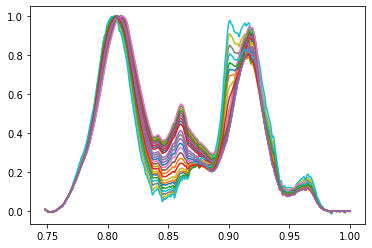

In [78]:
df = data_norm.drop(['x_fit'], axis=1)
plt.plot(data_norm['x_fit'],df)
# plt.legend(df.columns)